# Preliminary analysis for small aspect-ratio

We have datasets corresponding to variation in the following parameters of the ligament ensemble
- Two levels of initial perturbation strength : $\varepsilon = \{0.038, 0.076\}$
- Aspect-ratio, defined with respect to initial ligament width : $\Lambda = 50$

We start by loading the required libraries, and set the plotting styles. 

In [1]:
from IPython.core.interactiveshell import InteractiveShell

# pretty print all cell's output and not just the last one
InteractiveShell.ast_node_interactivity = "all"

# Required libraries for data arrays, data manipulation, plotting etc
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_context("poster")
sns.set(rc={'figure.figsize': (16, 9.)})
sns.set_style("whitegrid")

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['text.latex.preamble']=[r"\usepackage{lmodern}",r'\boldmath']


#sns.set(style="white", palette="muted")
#sns.set_context("paper")


This is an example of the images generated from the simulation of an individual ligament.

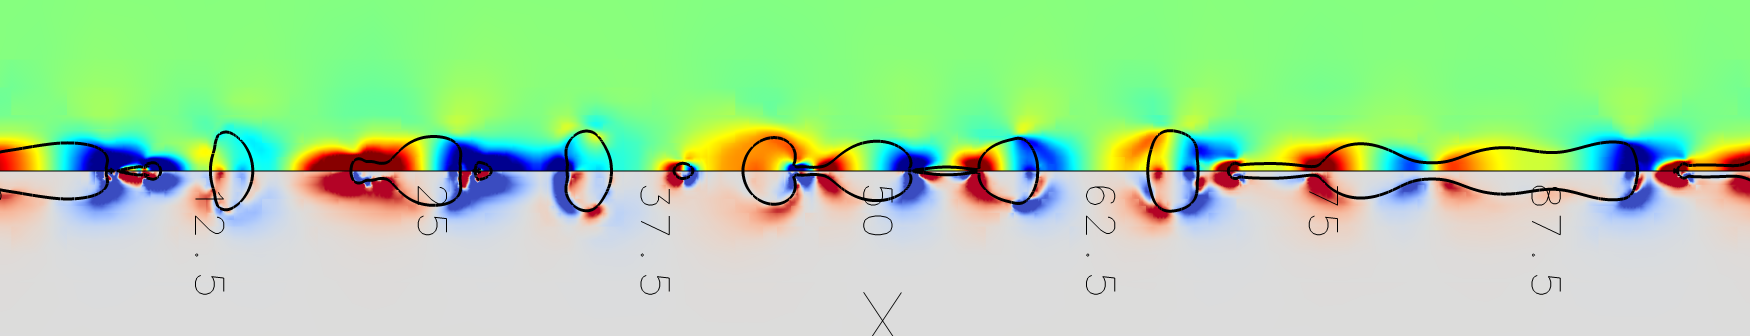

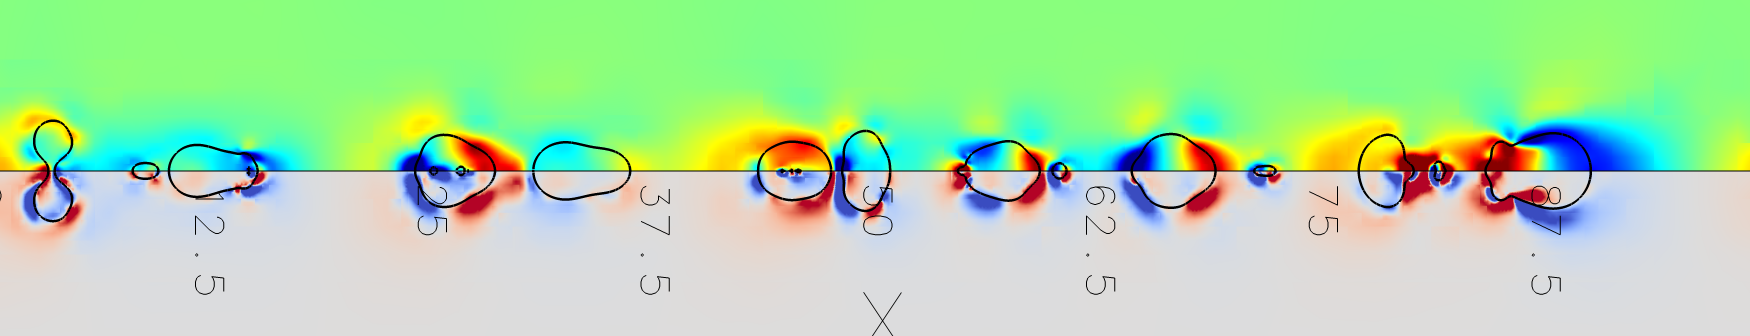

In [2]:
from IPython.display import Image, display

listOfImageNames = ['../d1/img-snapshot-12.png',
                    '../d3/img-snapshot-12.png']

for imageName in listOfImageNames:
    display(Image(filename=imageName))

Both images are saved at $T=12$, where the top image corresponds to the weaker initial perturbation. Now we load the big dataset. 

In [3]:
big_1 = pd.read_csv("../results", sep=" ")
big_1.head()

Ohnesorge  aspect-ratio  cut-off  amplitude  time  tag  position  velocity  \
0       0.01            50      0.5        0.1     0    1   49.4770  0.000000   
1       0.01            50      0.5        0.1     6    1   49.4352 -0.000002   
2       0.01            50      0.5        0.1    12    1   49.2898  0.000295   
3       0.01            50      0.5        0.1    18   13   93.7334 -0.081582   
4       0.01            50      0.5        0.1    18   12   84.5200 -0.878589   

       area  diameter       mass  separation  cells  
0  100.8100  11.33220  761.60000    100.0000   7797  
1  103.4560  11.48000  791.78400    100.0000    828  
2  101.9160  11.39430  774.17600    100.0000   2487  
3   10.3715   3.63485   25.13270     27.0941    190  
4    1.8992   1.55543    1.96938      9.2134    181

The **area** column is not actually area, but for the 3D axisymmetric solver, the `dv` volume element corresponds to volume per unit radian. Thus, all integral quantities (e.g. drop volume) need to be multiplied by a factor of $2\pi$. 

> The volume of the ligaments in our case are $\pi R^2 L$, where $R=1$. Thus, $\pi L$ gives us the initial ligament volume, where $L=2\Lambda$. 

In [4]:
# slicing the old dataset
# d1 : small amp - small aspect

d1 = big_1.loc[(big_1.amplitude == 0.1) & (big_1['aspect-ratio'] == 50)]

#viewing the new dataset
d1.head()

# Checking the volume of the ligaments at time T = 0, mean and std
d1.area.loc[d1.time == 0].mean() , d1.area.loc[d1.time == 0].std()


Ohnesorge  aspect-ratio  cut-off  amplitude  time  tag  position  velocity  \
0       0.01            50      0.5        0.1     0    1   49.4770  0.000000   
1       0.01            50      0.5        0.1     6    1   49.4352 -0.000002   
2       0.01            50      0.5        0.1    12    1   49.2898  0.000295   
3       0.01            50      0.5        0.1    18   13   93.7334 -0.081582   
4       0.01            50      0.5        0.1    18   12   84.5200 -0.878589   

       area  diameter       mass  separation  cells  
0  100.8100  11.33220  761.60000    100.0000   7797  
1  103.4560  11.48000  791.78400    100.0000    828  
2  101.9160  11.39430  774.17600    100.0000   2487  
3   10.3715   3.63485   25.13270     27.0941    190  
4    1.8992   1.55543    1.96938      9.2134    181

(100.1493065950002, 1.2641804703570183)

In [5]:
# slicing the old dataset
# d1 : small amp - small aspect

d3 = big_1.loc[(big_1.amplitude == 0.2) & (big_1['aspect-ratio'] == 50)]

#viewing the new dataset
d3.head()

# Checking the volume of the ligaments at time T = 0, mean and std
d3.area.loc[d3.time == 0].mean() , d3.area.loc[d3.time == 0].std()


Ohnesorge  aspect-ratio  cut-off  amplitude  time  tag  position  \
1680726       0.01            50      0.5        0.2     0    1   48.9594   
1680727       0.01            50      0.5        0.2     6    1   48.9057   
1680728       0.01            50      0.5        0.2    12   14   84.3172   
1680729       0.01            50      0.5        0.2    12   13   70.8915   
1680730       0.01            50      0.5        0.2    12   12   64.4259   

         velocity        area   diameter        mass  separation  cells  
1680726  0.000000  101.725000  11.383600  771.997000   100.00000   7758  
1680727 -0.000527  103.445000  11.479400  791.660000   100.00000   1397  
1680728  0.002377   30.222700   6.204860  125.019000    69.86240    701  
1680729  2.326830    0.243942   0.557453    0.090658    13.42570     66  
1680730  0.084844    8.234140   3.238730   17.778700     6.46556    191

(100.45942980500006, 2.5303276731618842)

## Volume correction and diameter computation

Now let us recompute the *volume* of the drops ("area"), by multiplying with $2\pi$, and recompute the diameters using the new volumes. We create a function that applies this to the dataset. The **area** column in this dataset is already multiplied by $2.0$, thus we just need to further multiply by $\pi$. 

In [138]:
# Create a function that modifies the volume ("area" column), then computes the new diameters
def volume_3d(df):
    df.area = df.area * np.pi
    df.diameter = ((6.0*df.area)/np.pi)**(1.0/3.0)
    return df

In [15]:
d1_new = d1.apply(volume_3d, axis='columns')
d1_new.head()

Ohnesorge  aspect-ratio  cut-off  amplitude  time   tag  position  \
0       0.01          50.0      0.5        0.1   0.0   1.0   49.4770   
1       0.01          50.0      0.5        0.1   6.0   1.0   49.4352   
2       0.01          50.0      0.5        0.1  12.0   1.0   49.2898   
3       0.01          50.0      0.5        0.1  18.0  13.0   93.7334   
4       0.01          50.0      0.5        0.1  18.0  12.0   84.5200   

   velocity        area  diameter       mass  separation   cells  
0  0.000000  316.703955  8.457038  761.60000    100.0000  7797.0  
1 -0.000002  325.016610  8.530392  791.78400    100.0000   828.0  
2  0.000295  320.178557  8.487853  774.17600    100.0000  2487.0  
3 -0.081582   32.583028  3.962759   25.13270     27.0941   190.0  
4 -0.878589    5.966513  2.250301    1.96938      9.2134   181.0

In [16]:
d3_new = d3.apply(volume_3d, axis='columns')
d3_new.head()

Ohnesorge  aspect-ratio  cut-off  amplitude  time   tag  position  \
1680726       0.01          50.0      0.5        0.2   0.0   1.0   48.9594   
1680727       0.01          50.0      0.5        0.2   6.0   1.0   48.9057   
1680728       0.01          50.0      0.5        0.2  12.0  14.0   84.3172   
1680729       0.01          50.0      0.5        0.2  12.0  13.0   70.8915   
1680730       0.01          50.0      0.5        0.2  12.0  12.0   64.4259   

         velocity        area  diameter        mass  separation   cells  
1680726  0.000000  319.578513  8.482548  771.997000   100.00000  7758.0  
1680727 -0.000527  324.982052  8.530089  791.660000   100.00000  1397.0  
1680728  0.002377   94.947412  5.660153  125.019000    69.86240   701.0  
1680729  2.326830    0.766366  1.135392    0.090658    13.42570    66.0  
1680730  0.084844   25.868314  3.669356   17.778700     6.46556   191.0

Let us start by visualizing the temporal evolution an an individual ligament from dataset `d1`, along with the corresponding statistical size distributions. 

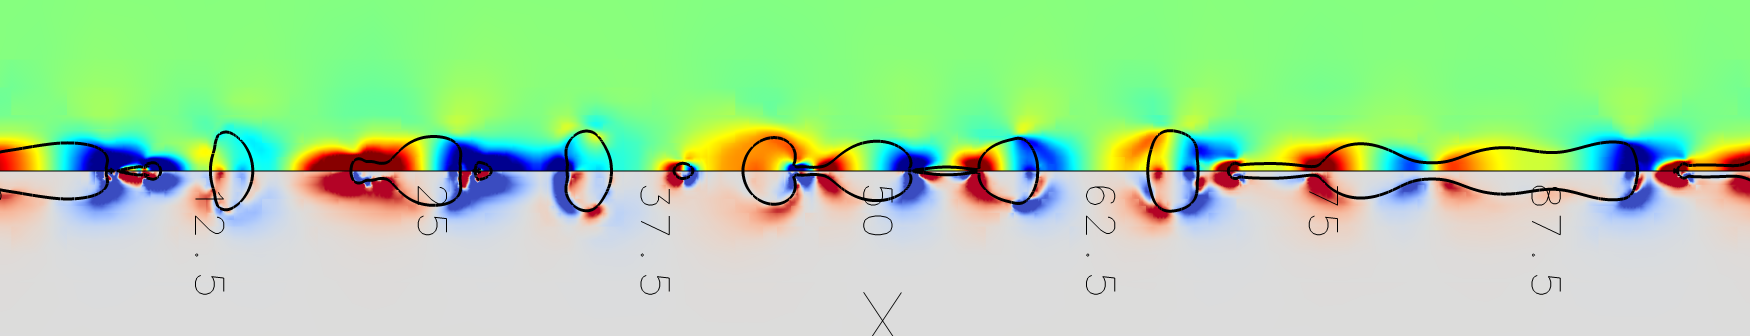

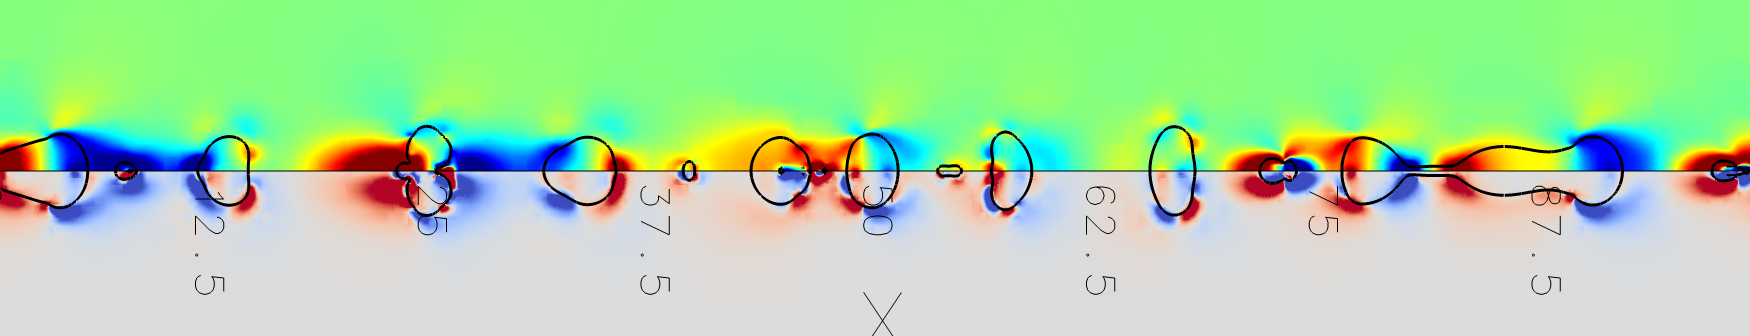

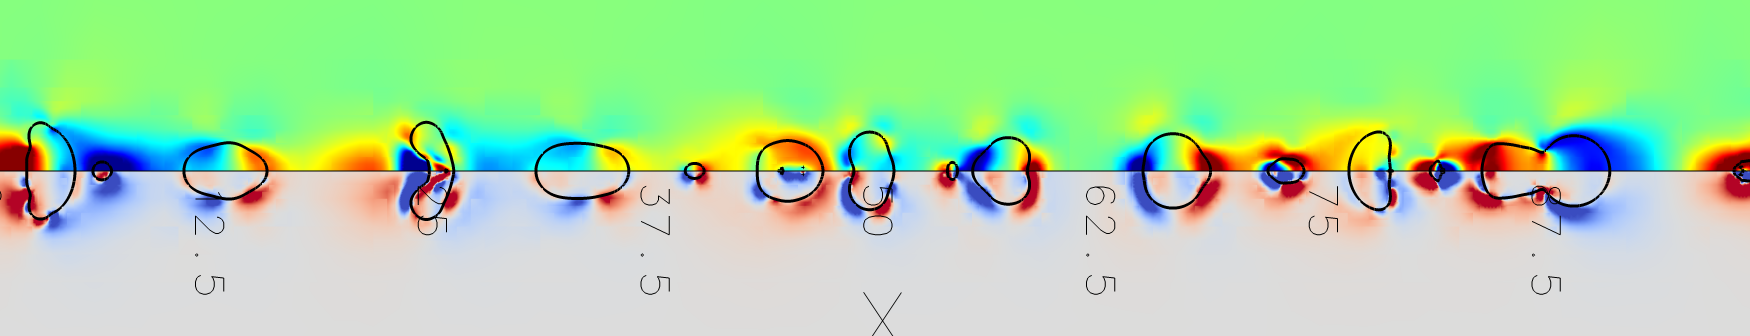

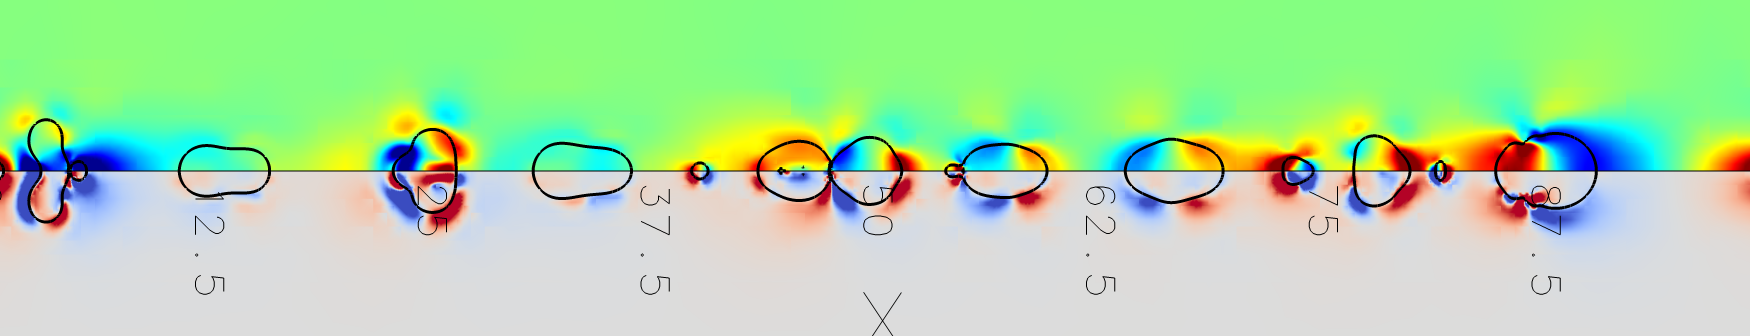

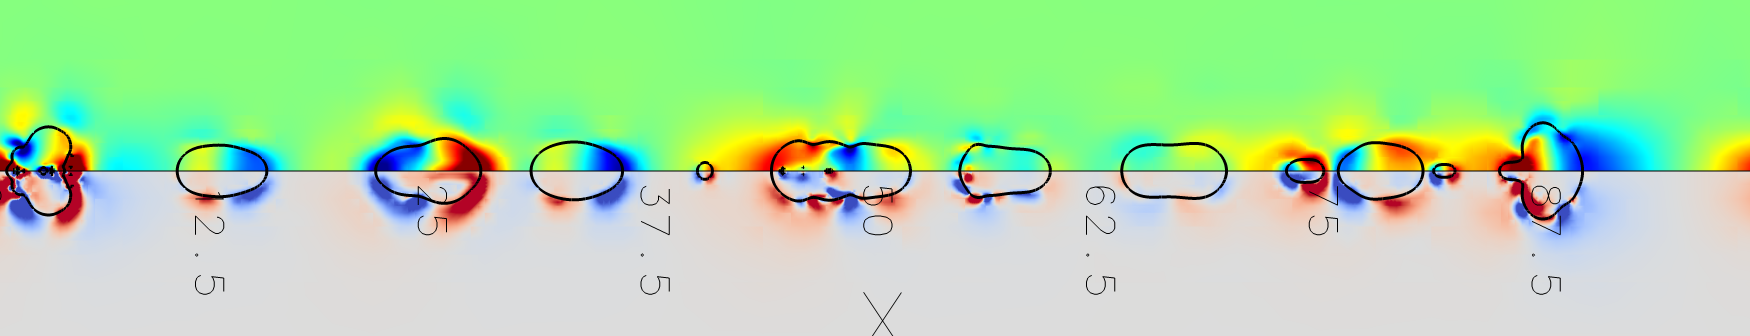

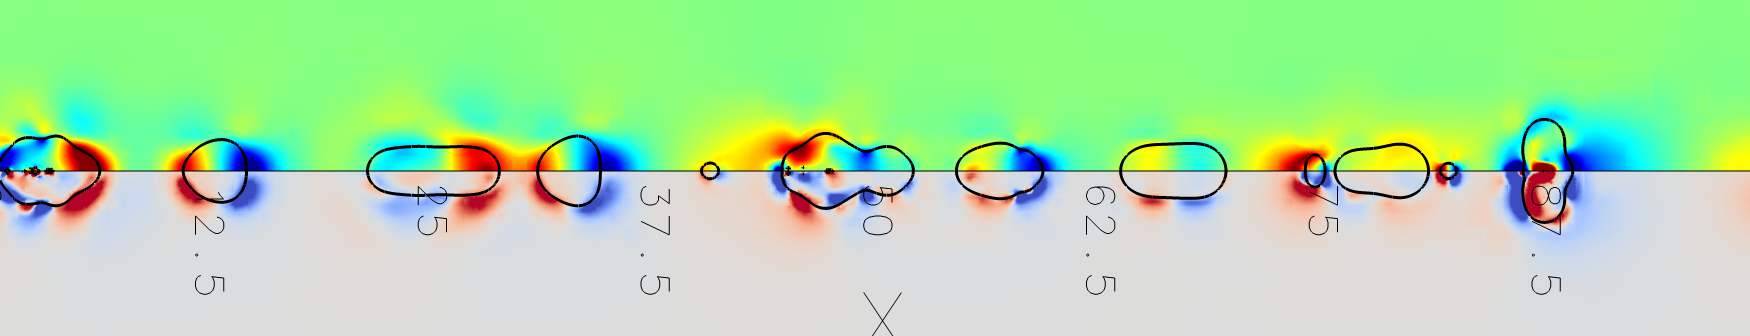

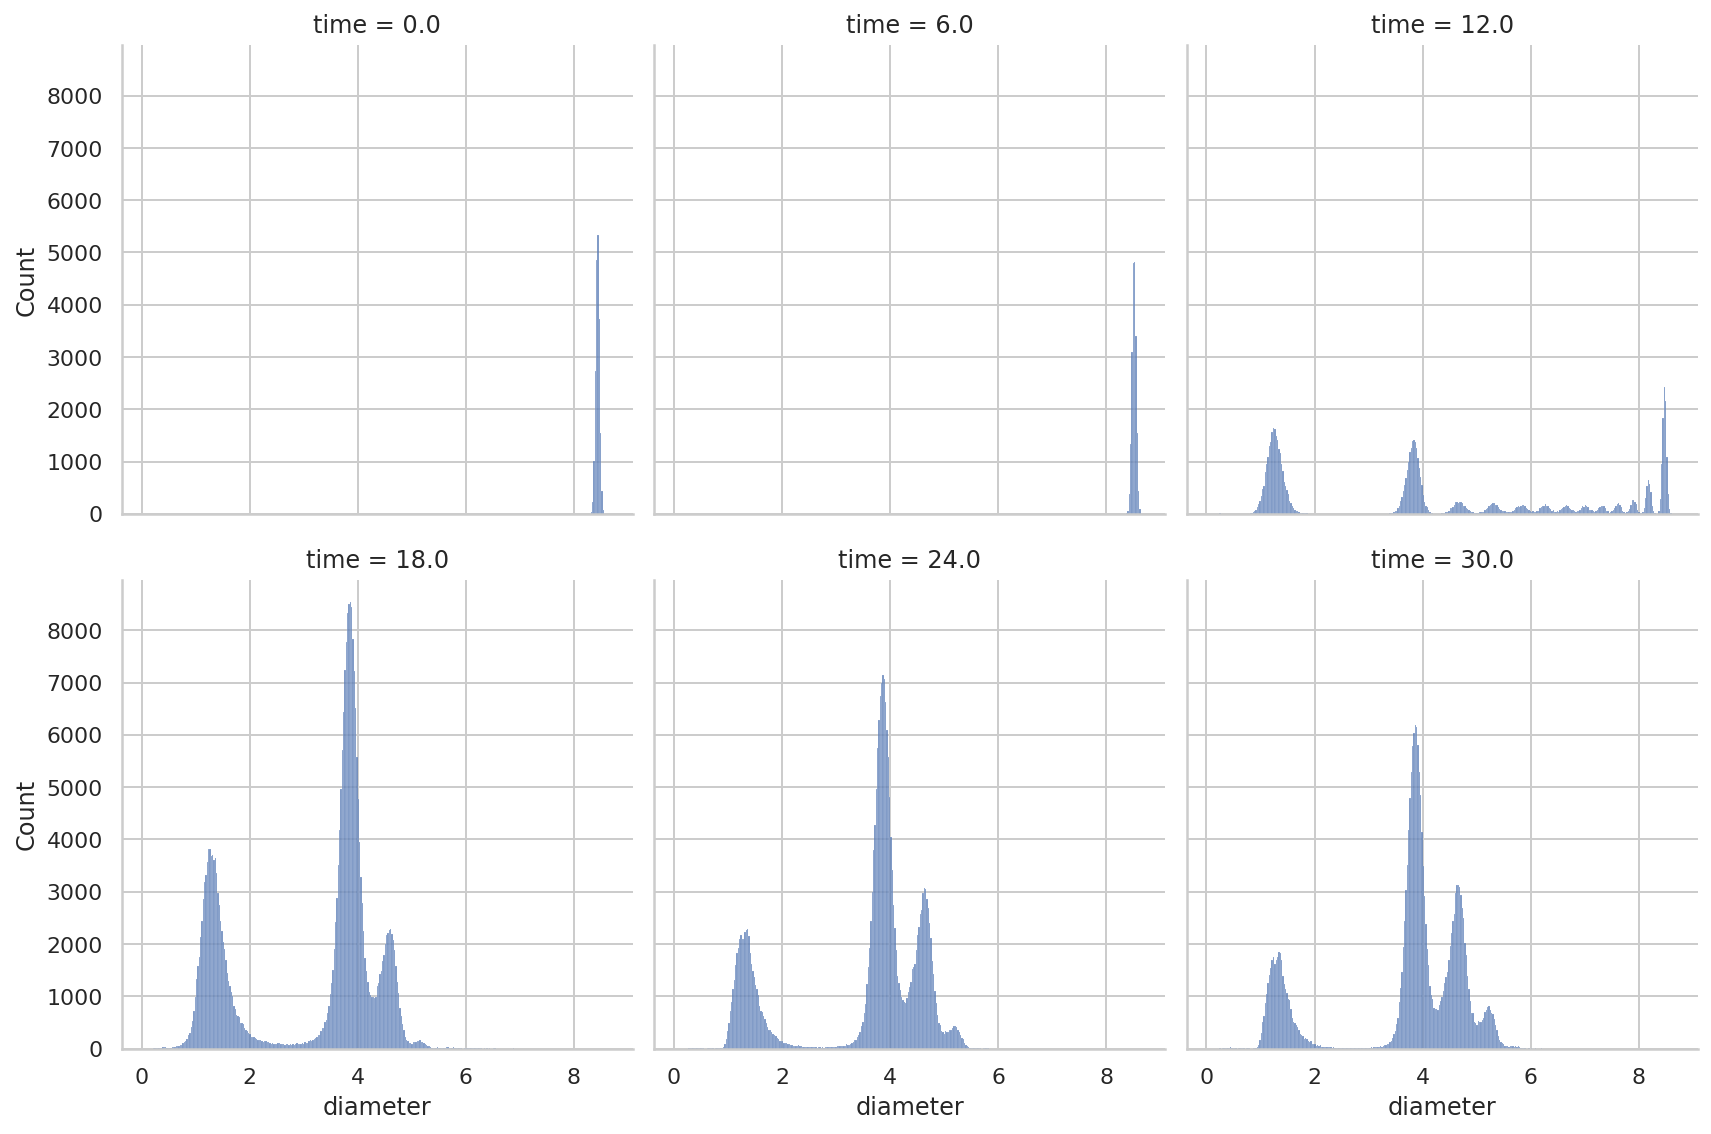

In [17]:
list_1 = [
          '../d1/img-snapshot-12.png',`
          '../d1/img-snapshot-13.png',
          '../d1/img-snapshot-14.png',
          '../d1/img-snapshot-15.png',
          '../d1/img-snapshot-16.png',
          '../d1/img-snapshot-17.png',   
         ]

# display plots from individual ligament simulations for times T=12 to T=17
for imageName in list_1:
    display(Image(filename=imageName))
    
sns.displot(data=d1_new, kind="hist", kde=False, x="diameter", col="time", 
            legend=True, palette="bright", height=4.0, aspect=1.0, col_wrap=3); 



We repeat the same exercise for an individual ligament from dataset `d3`, along with the corresponding statistical size distributions. 

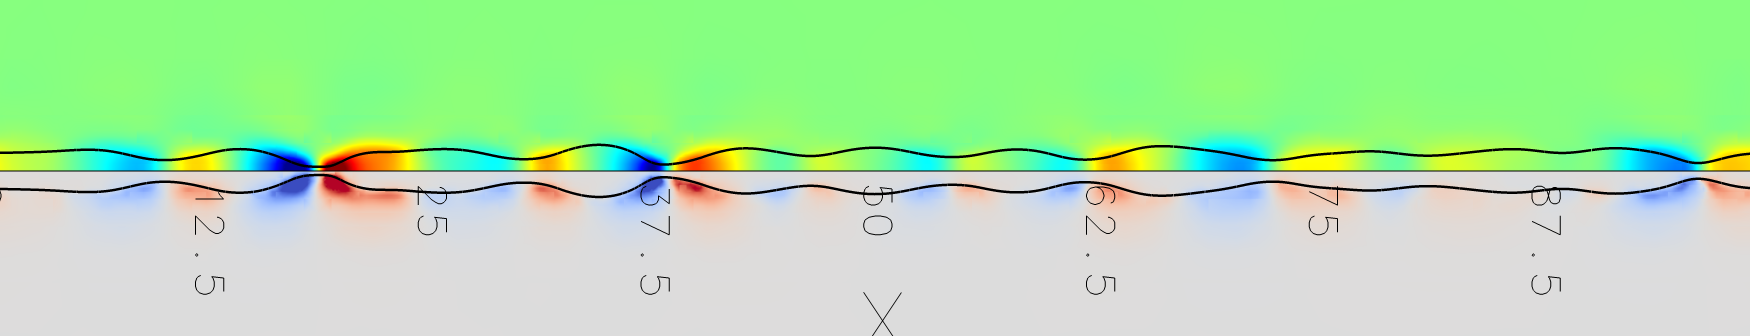

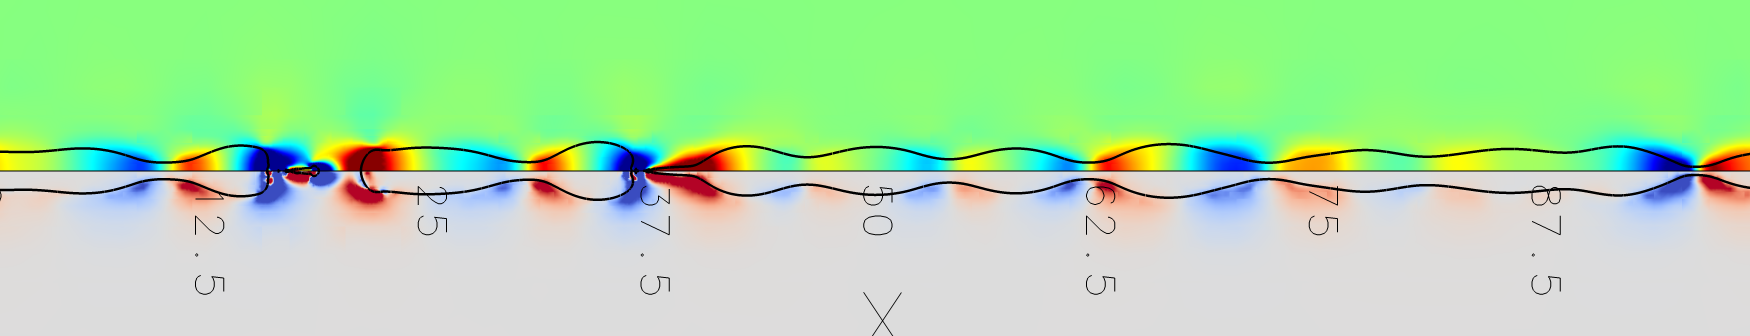

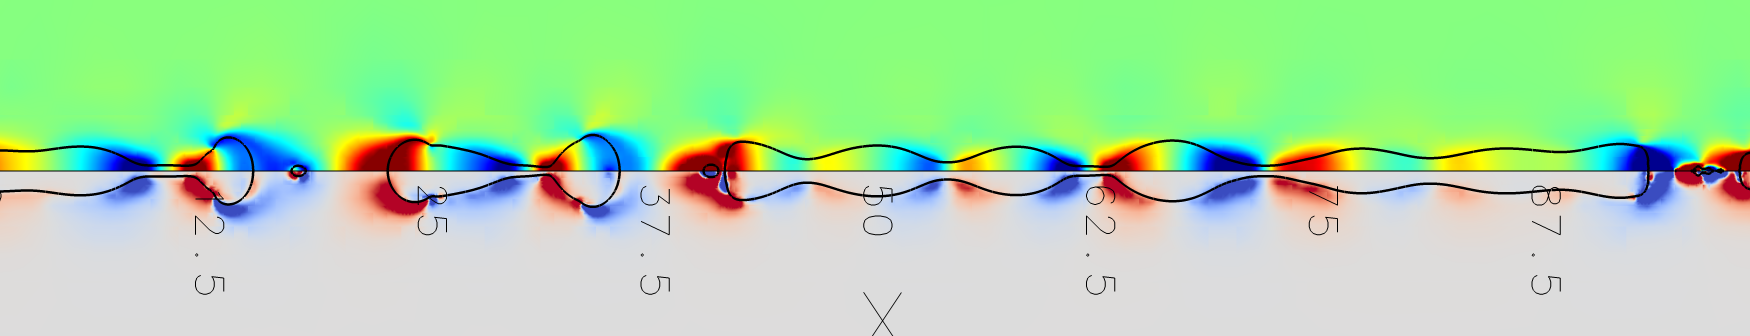

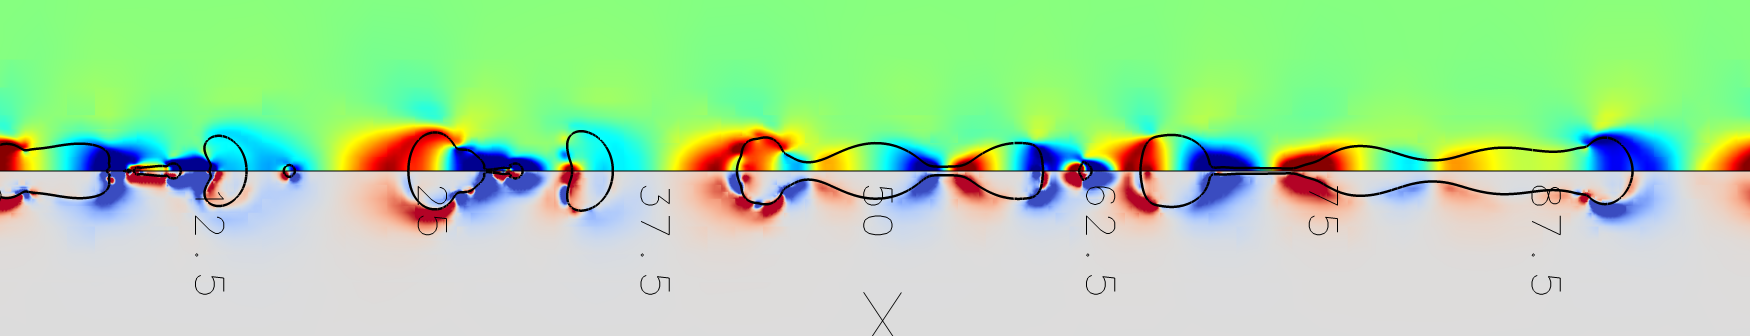

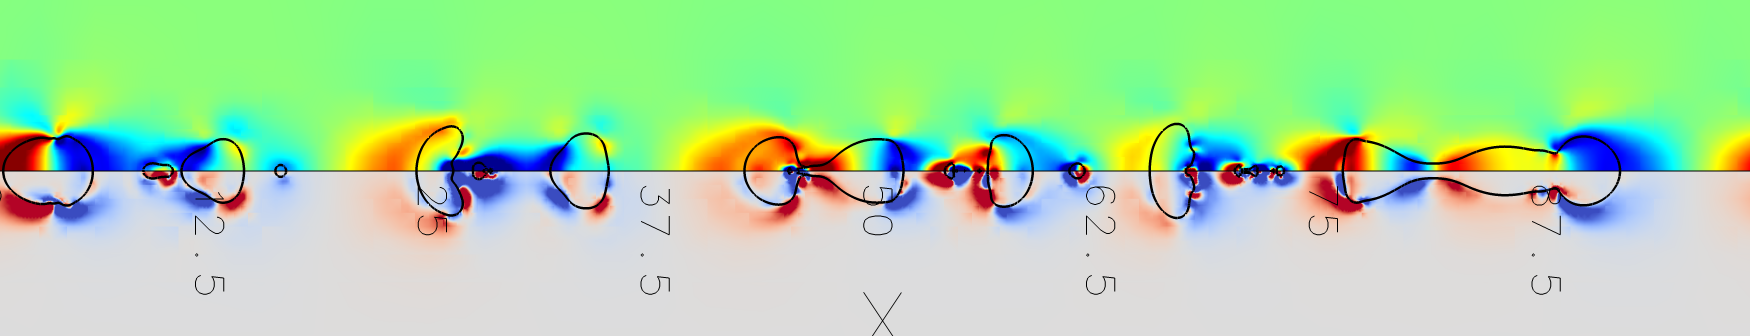

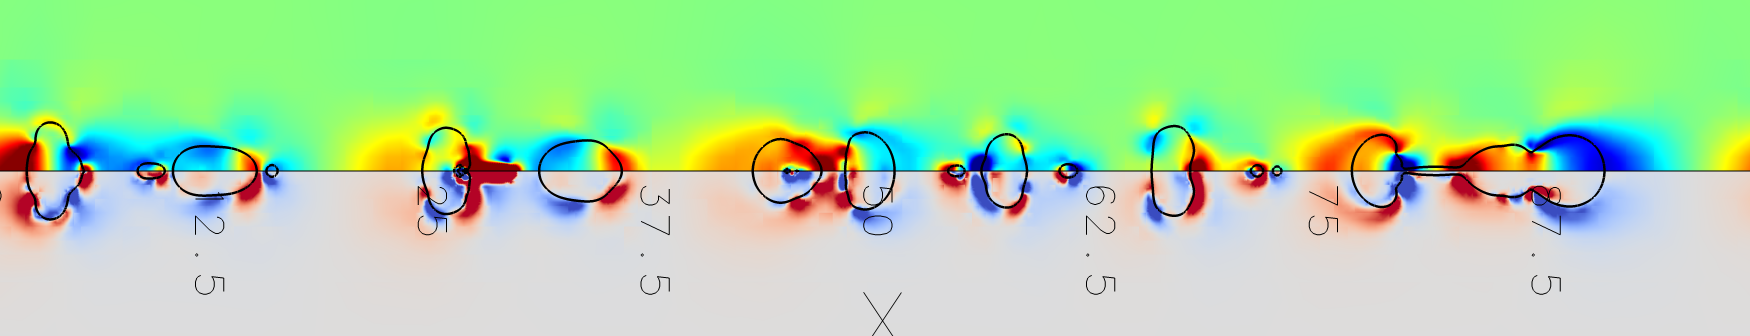

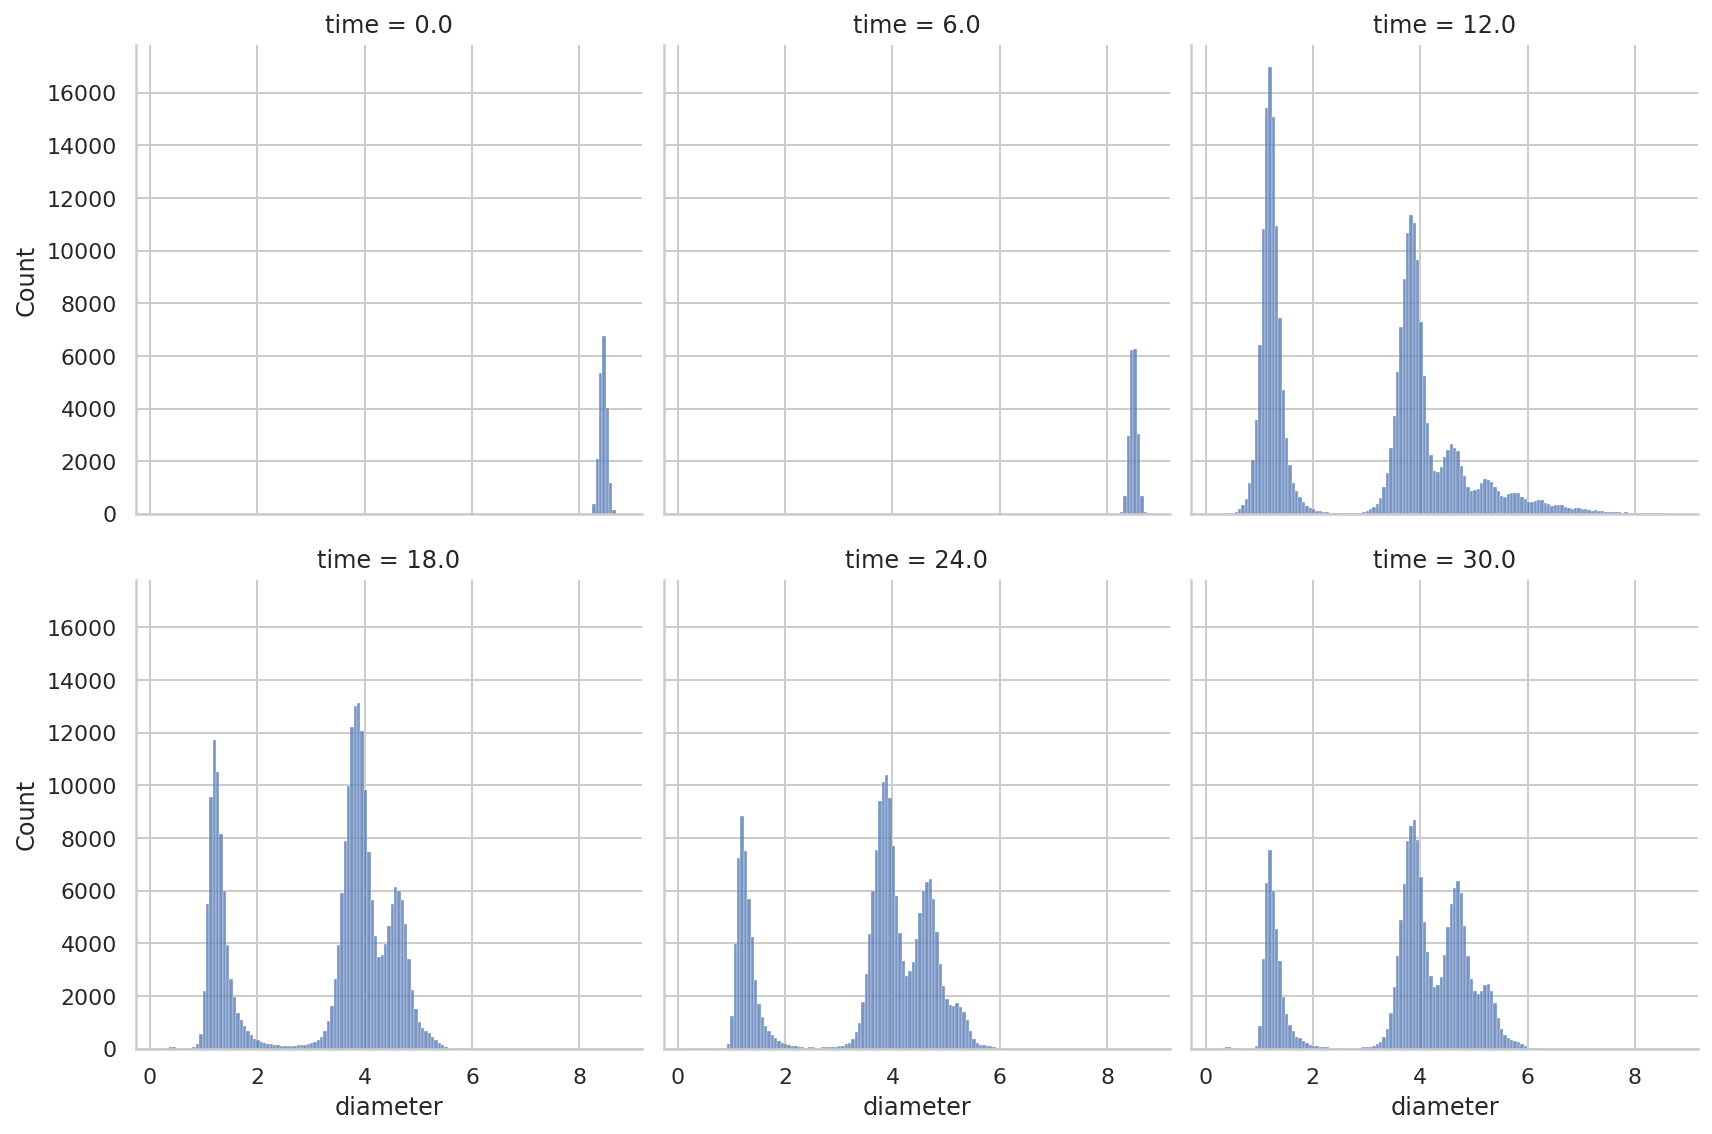

In [18]:
list_2 = [
          '../d3/img-snapshot-6.png',
          '../d3/img-snapshot-7.png',
          '../d3/img-snapshot-8.png',
          '../d3/img-snapshot-9.png',
          '../d3/img-snapshot-10.png',
          '../d3/img-snapshot-11.png',   
         ]

# display plots from individual ligament simulations for times T=12 to T=17
for imageName in list_2:
    display(Image(filename=imageName))
    
sns.displot(data=d3_new, kind="hist", kde=False, x="diameter", col="time", 
            legend=True, palette="bright", height=4.0, aspect=1.0, col_wrap=3); 



## Verification of quantization effects


### Equivalent Diameters
Let us compute the values for the **equivalent diameters**, which can be simply estimated by equating the volume under our *discrete* wavelengths ($L_i $) to the volume of a drop with diameter $D_i$. Thus we get 

$$ \pi D_i^3 /6 = \pi R^2 L_i \implies D_i = (6 L_i R^2 )^{1/3} $$ 

The $i$ in the above equation refers to the discrete wave number, whose wavelength is given by $L_i = L/i$. We also rescale the the diameters with the intial width of the ligament $W$, thus giving us 

$$ D_i / W = \left(3\Lambda /2i \right)^{1/3} \,. $$

### Rayleigh-Plateau unstable wavelengths

Now, setting $i=1$, we get the maximum possible equivalent diameter, which is the case if the entire ligament collapsed into a single drop.
The shortest wavelength which is unstable with respect to Rayleigh-Plateau is given by 

$$ i \approx \Lambda/\pi \quad \implies D_\textrm{short}/W \approx 1.68 \,.$$ 

For the optimal (largest growth rate) wavelength of the Rayleigh-Plateau instability, we have 

$$ i \approx 0.7 \Lambda/\pi \quad \implies D_\textrm{rp}/W \approx 1.89 \,.$$ 

> $\Lambda = 50$ for `d1` and `d3` datasets. 

Therefore, we have several interesting values for the equivalent diameters as follows 
- $D_\textrm{max}/W \approx 4.21$ : Largest wavelength for the $\Lambda =50$ (entire ligament) .
- $D_\textrm{rp}/W \approx 1.89$ : Wavelength corresponding to optimal growth rate of Rayleigh-Plateau instability.
- $D_\textrm{short}/ W \approx 1.68$ : Shortest unstable wavelength for Rayleigh-Plateau instability.
- $D_\textrm{cut}/W \approx 1.14 $: Cut-off wavelengths set by low-pass filter for the $\Lambda =50$.


We also have to take into account the size of drops that form after a coalescence event. We assign the important values of $D/W$ computed above to some variables, and also define a function that computes the diameter of a drop formed due to coalescence of two drops. 

In [108]:
#initializing values for analysis of d1,d3 datasets

d_max = 4.21 
d_rp = 1.89
d_sh = 1.68
d_cut = 1.14 
d_coalesce = d_rp*(2.0**(1.0/3.0))

# creating a function that computes D/W for coalescing drops (based on RP optimal)
# inputs : base (e.g. rp diameter), fractions of base d1,d2
def d_coalesce(base,d1,d2):
    factor = (d1+d2)**(1.0/3.0)
    return base*factor

### Linear scale plots

Now we plot the histogram for dataset `d1` at $T=18$. 

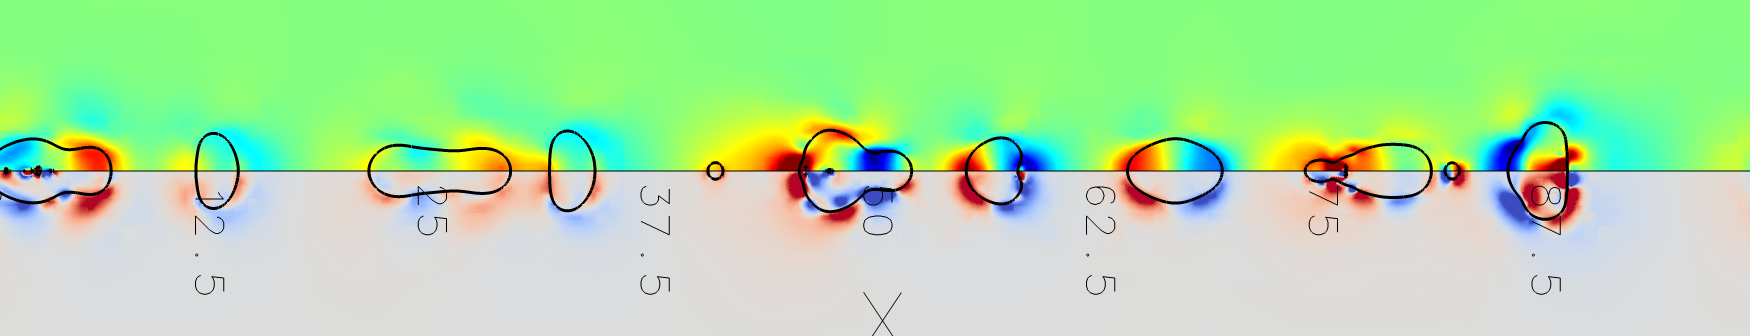

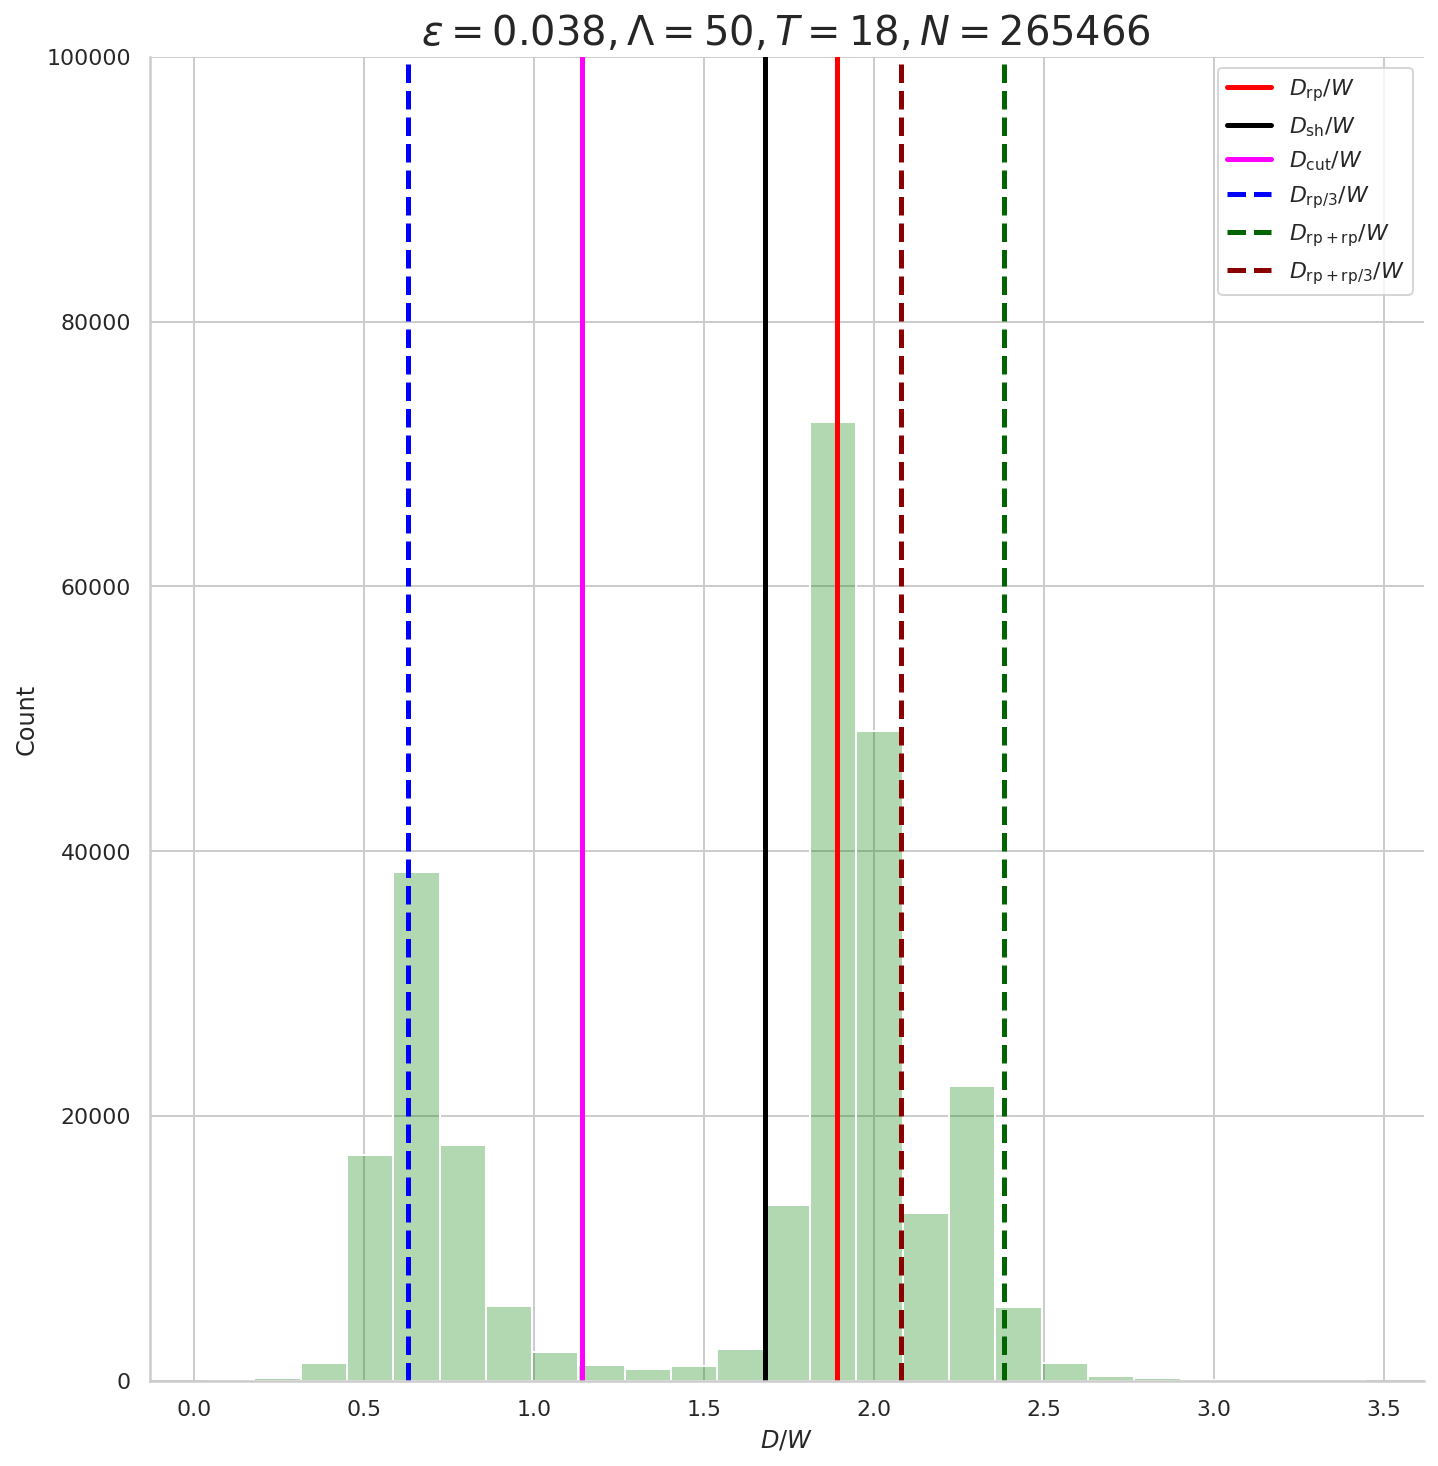

In [142]:
# histogram for d1

display(Image(filename="../d1/img-snapshot-18.png"))

time = 18
bins = 25

sns.displot(data=d1_new.diameter[(d1_new.time == time)].map(lambda p: p/2.0), kind="hist", kde=False,
            legend=True, palette="bright", height=10.0, aspect=1.0,
           alpha = 0.3 , color = 'green', bins = bins) ;

# plotting the vertical lines for d_max, d_rp, d_sh, d_cut 

#plt.axvline(x = d_max, label = r'$D_{\rm{max}}$', color='darkgreen',lw=2.5);
plt.axvline(x = d_rp, label = r'$D_{\rm{rp}}/W$', color='red', lw=2.5);
plt.axvline(x = d_sh, label = r'$D_{\rm{sh}}/W$', color='black', lw=2.5);
plt.axvline(x = d_cut, label = r'$D_{\rm{cut}}/W$', color='magenta', lw=2.5);
plt.axvline(x = d_rp/3.0, label = r'$D_{\rm{rp}/3}/W$', color='blue', lw=2.5, linestyle='--');
#plt.xlim(right = 5.0);
plt.axvline(x = d_coalesce(d_rp,1.0,1.0), label = r'$D_{\rm{rp}+\rm{rp}}/W$', color='darkgreen', lw=2.5, linestyle='--');
plt.axvline(x = d_coalesce(d_rp,1.0,0.33), label = r'$D_{\rm{rp}+\rm{rp}/3}/W$', color='darkred', lw=2.5, linestyle='--');
plt.title(r'$\varepsilon = 0.038, \Lambda = 50 , T=%d, N=%d$ ' %(time,d1_new.diameter[d1_new.time == time].shape[0]), fontsize=20);
plt.ylim(top=100000);
plt.xlabel(r'$D/W$')
plt.legend();


Generating the plot for dataset `d3`, which corresponds to stronger initial perturbation. 

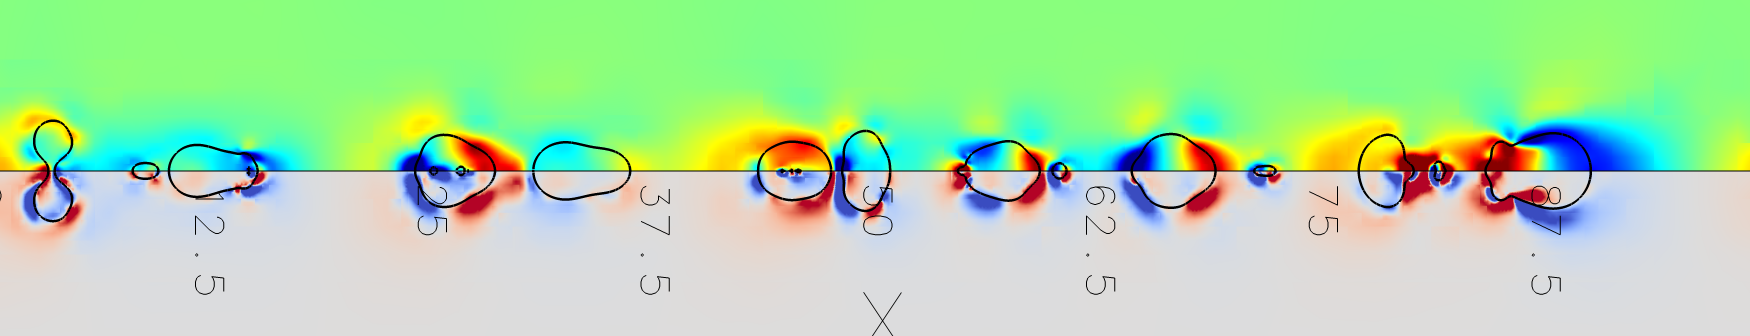

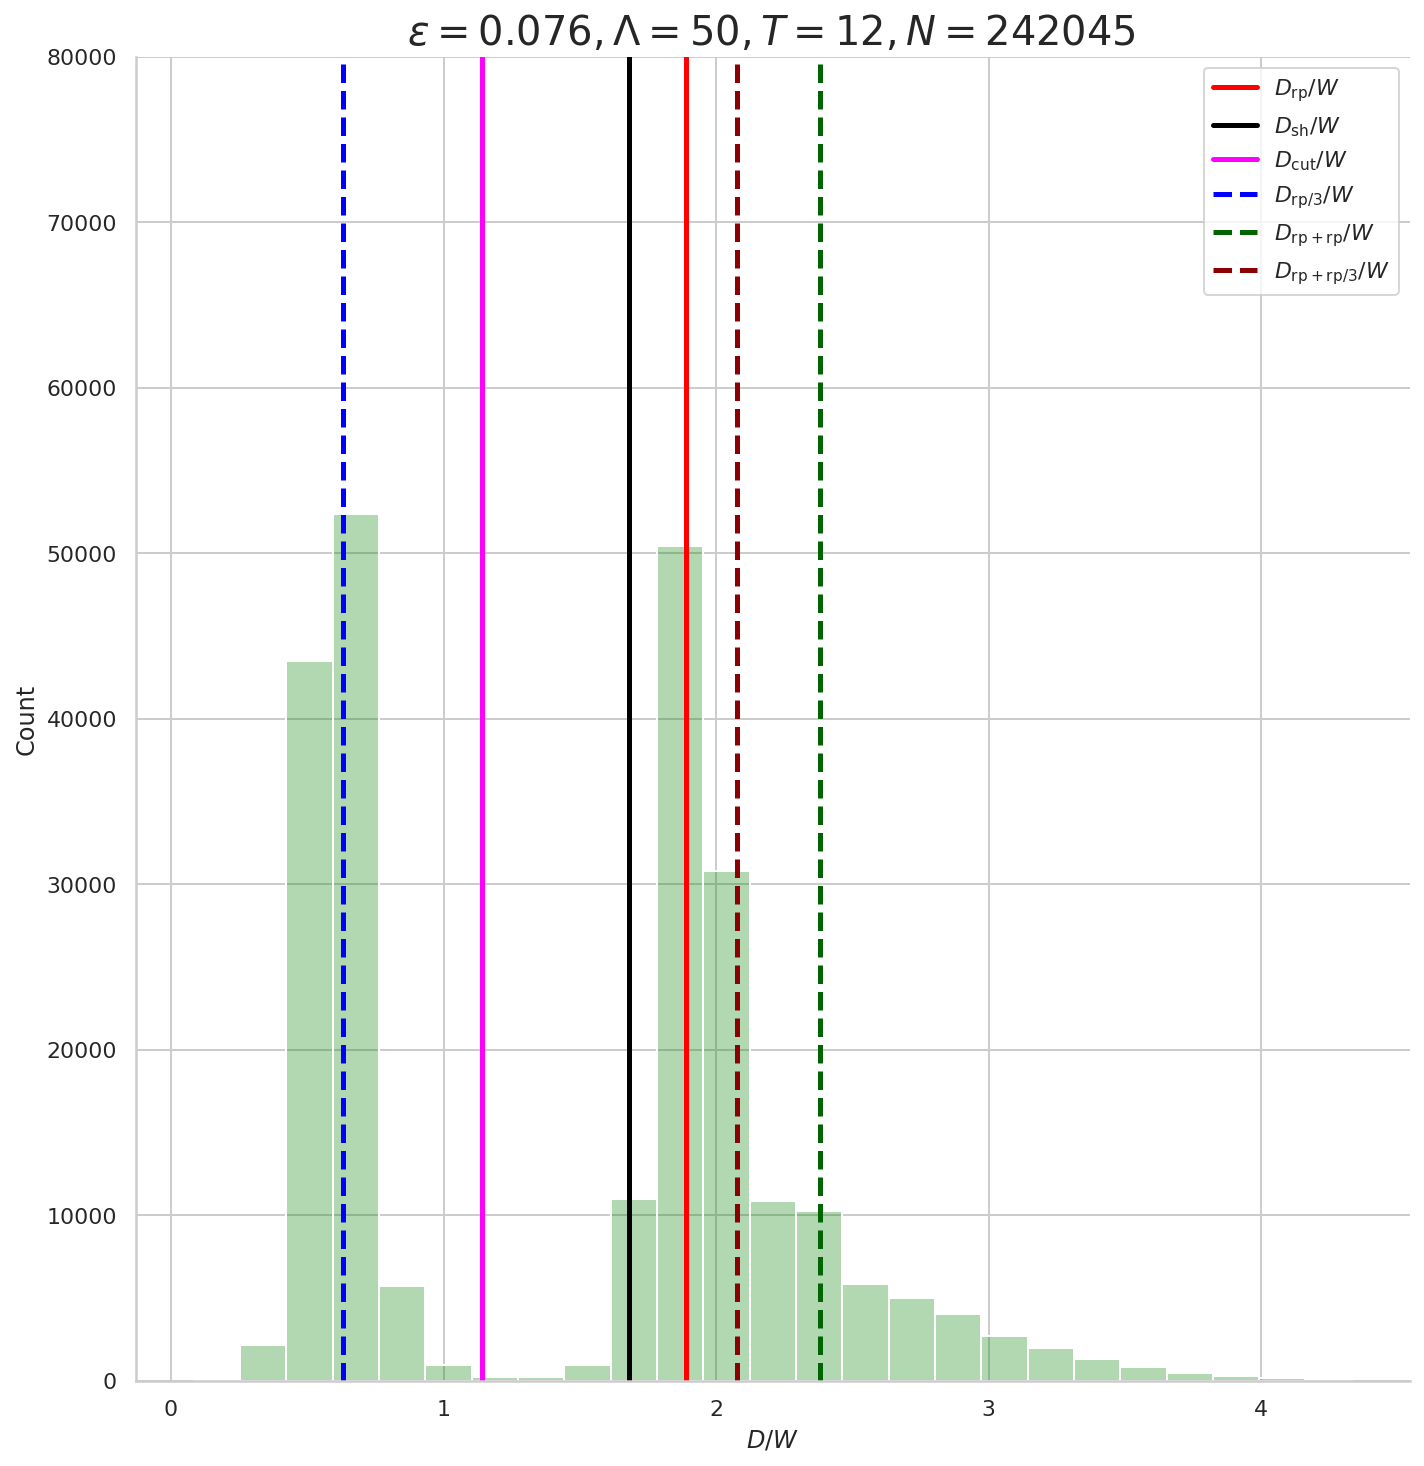

In [123]:
# histogram for d3

display(Image(filename="../d3/img-snapshot-12.png"))

time = 12
bins = 25

sns.displot(data=d3_new.diameter[(d3_new.time == time)].map(lambda p: p/2.0), kind="hist", kde=False,
            legend=True, palette="bright", height=10.0, aspect=1.0,
           alpha = 0.3 , color = 'green', bins = bins) ;

# plotting the vertical lines for d_max, d_rp, d_sh, d_cut 

#plt.axvline(x = d_max, label = r'$D_{\rm{max}}$', color='darkgreen',lw=2.5);
plt.axvline(x = d_rp, label = r'$D_{\rm{rp}}/W$', color='red', lw=2.5);
plt.axvline(x = d_sh, label = r'$D_{\rm{sh}}/W$', color='black', lw=2.5);
plt.axvline(x = d_cut, label = r'$D_{\rm{cut}}/W$', color='magenta', lw=2.5);
plt.axvline(x = d_rp/3.0, label = r'$D_{\rm{rp}/3}/W$', color='blue', lw=2.5, linestyle='--');
#plt.xlim(right = 5.0);
plt.axvline(x = d_coalesce(d_rp,1.0,1.0), label = r'$D_{\rm{rp}+\rm{rp}}/W$', color='darkgreen', lw=2.5, linestyle='--');
plt.axvline(x = d_coalesce(d_rp,1.0,0.33), label = r'$D_{\rm{rp}+\rm{rp}/3}/W$', color='darkred', lw=2.5, linestyle='--');
plt.title(r'$\varepsilon = 0.076, \Lambda = 50 , T=%d, N=%d$ ' %(time,d3_new.diameter[d3_new.time == time].shape[0]), fontsize=20);
plt.ylim(top=80000);
plt.xlabel(r'$D/W$')
plt.legend();


### Log ordinate plots

We first create a function that computes all the equivalent diameters corresponding to all the discrete wavelenghts perturbed. 

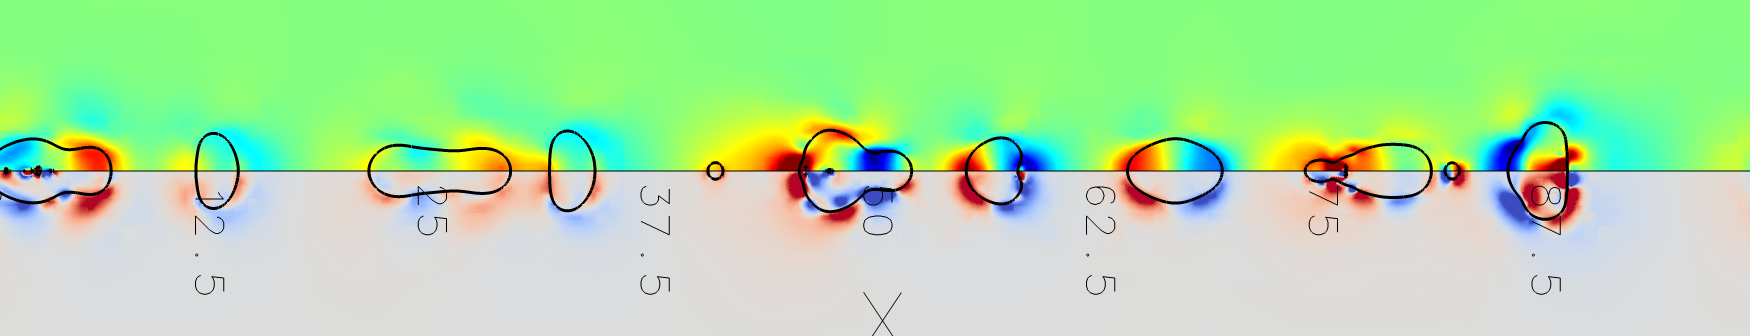

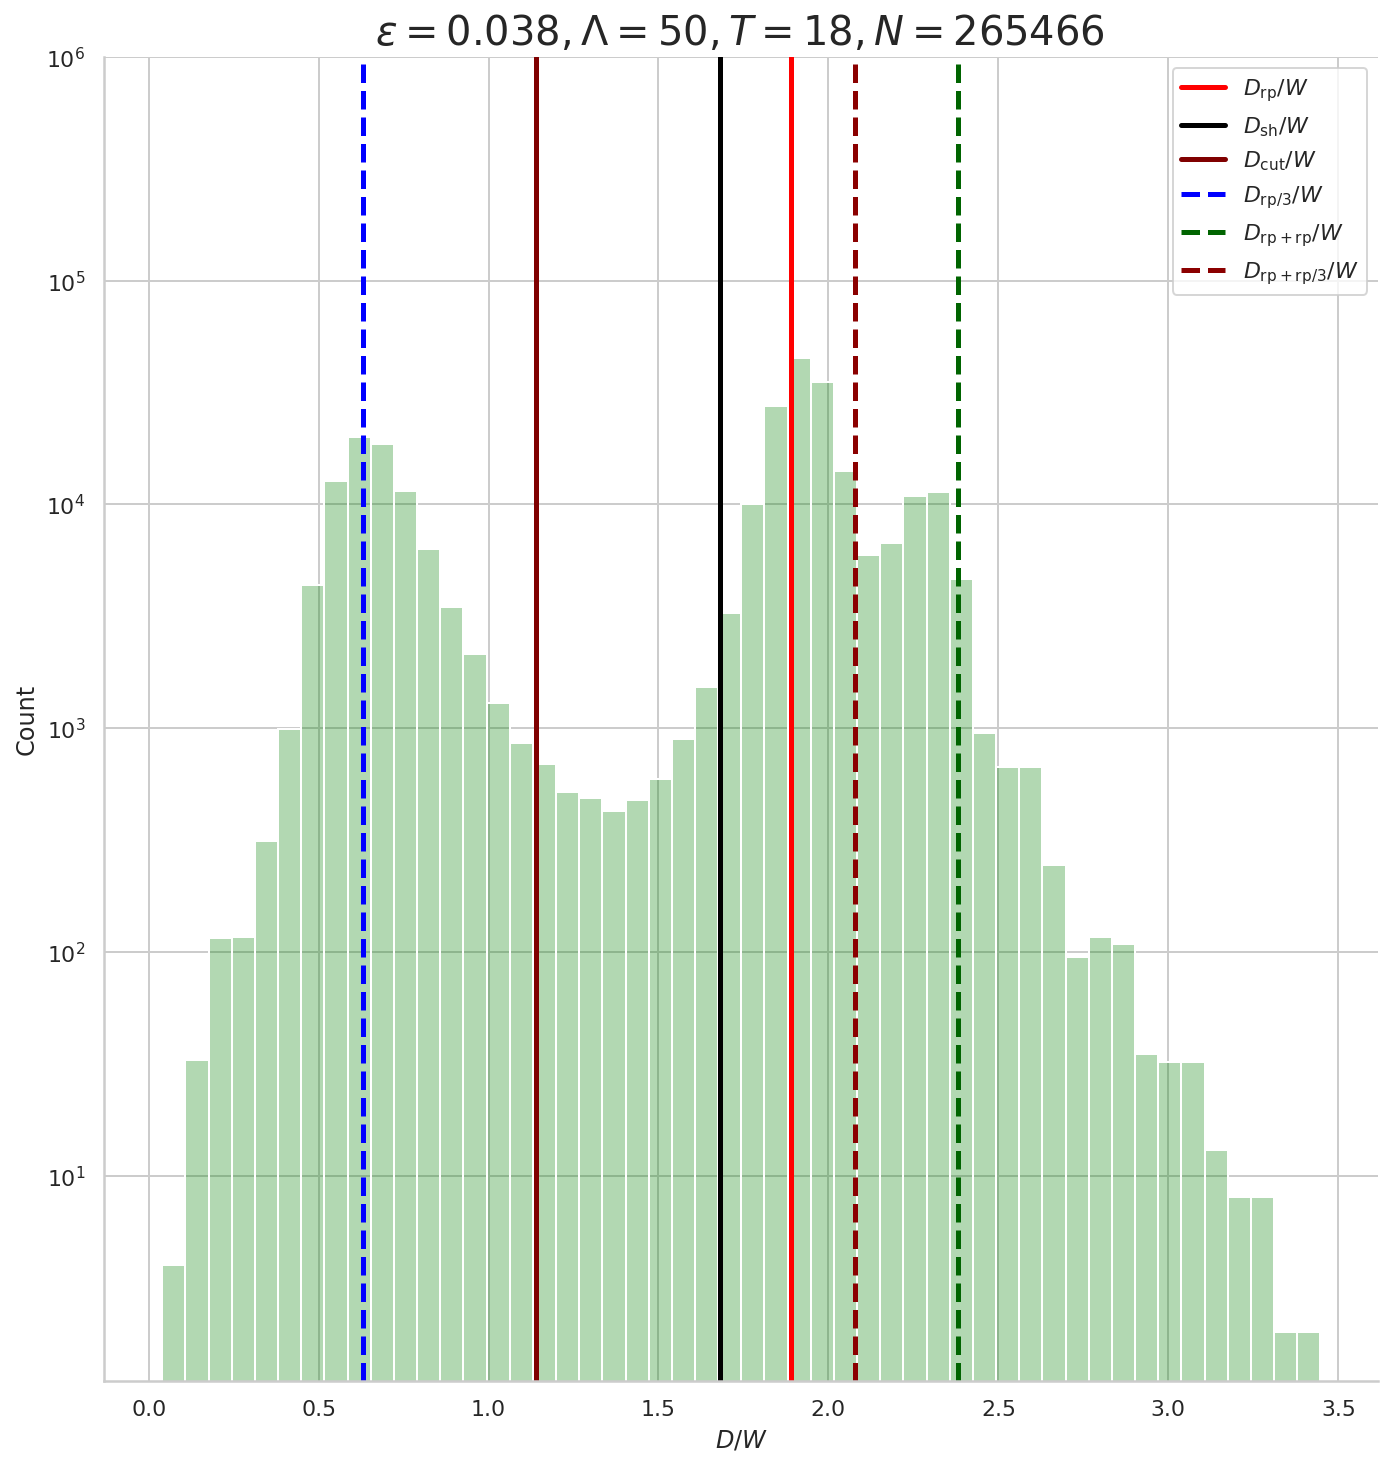

In [137]:
# Dataset d1

display(Image(filename="../d1/img-snapshot-18.png"))

# Select time slice 
time = 18

# Set the number of bins
n_bins = 50

sns.displot(data=d1_new.diameter[(d1_new.time == time)].map(lambda p: p/2.0), kind="hist", kde=False,
            legend=True, palette="bright", height=10.0, aspect=1.0,
           alpha = 0.3 , color = 'green', bins=n_bins) ;
  
#plt.axvline(x = d_max_1, label = r'$D_{\rm{max}}$', color='darkgreen',lw=2.5);
plt.axvline(x = d_rp, label = r'$D_{\rm{rp}}/W$', color='red', lw=2.5);
plt.axvline(x = d_sh, label = r'$D_{\rm{sh}}/W$', color='black', lw=2.5);
plt.axvline(x = d_cut, label = r'$D_{\rm{cut}}/W$', color='maroon', lw=2.5);
plt.axvline(x = d_rp/3.0, label = r'$D_{\rm{rp}/3}/W$', color='blue', lw=2.5, linestyle='--');
plt.axvline(x = d_coalesce(d_rp,1.0,1.0), label = r'$D_{\rm{rp}+\rm{rp}}/W$', color='darkgreen', lw=2.5, linestyle='--');
plt.axvline(x = d_coalesce(d_rp,1.0,0.33), label = r'$D_{\rm{rp}+\rm{rp}/3}/W$', color='darkred', lw=2.5, linestyle='--');
plt.title(r'$\varepsilon = 0.038, \Lambda = 50 , T=%d, N=%d$ ' %(time,d1_new.diameter[d1_new.time == time].shape[0]), fontsize=20);
plt.legend(loc='best');
plt.yscale("log");
plt.ylim(top=1e6);
#plt.xlim(right = 5.0);
plt.xlabel(r'$D/W$');

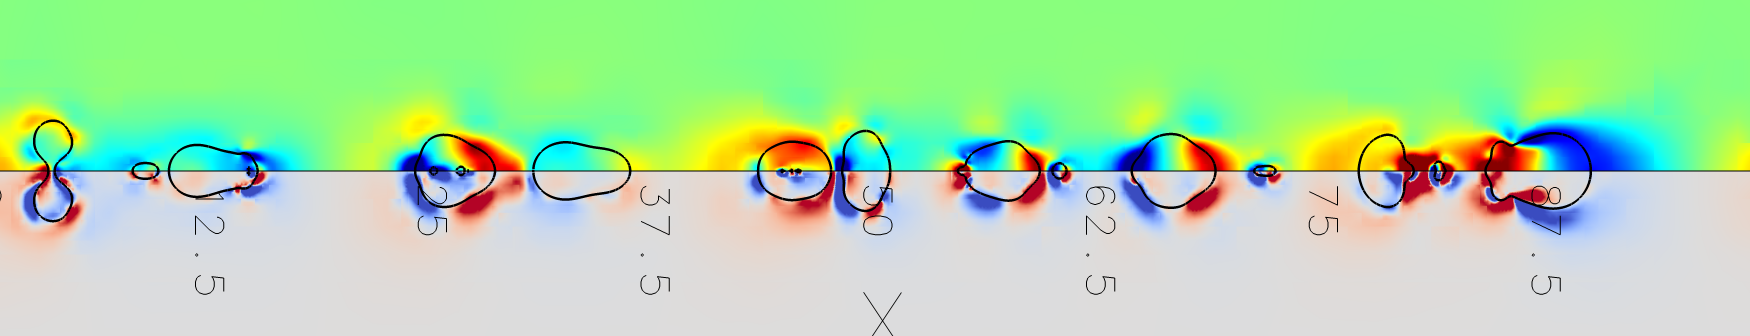

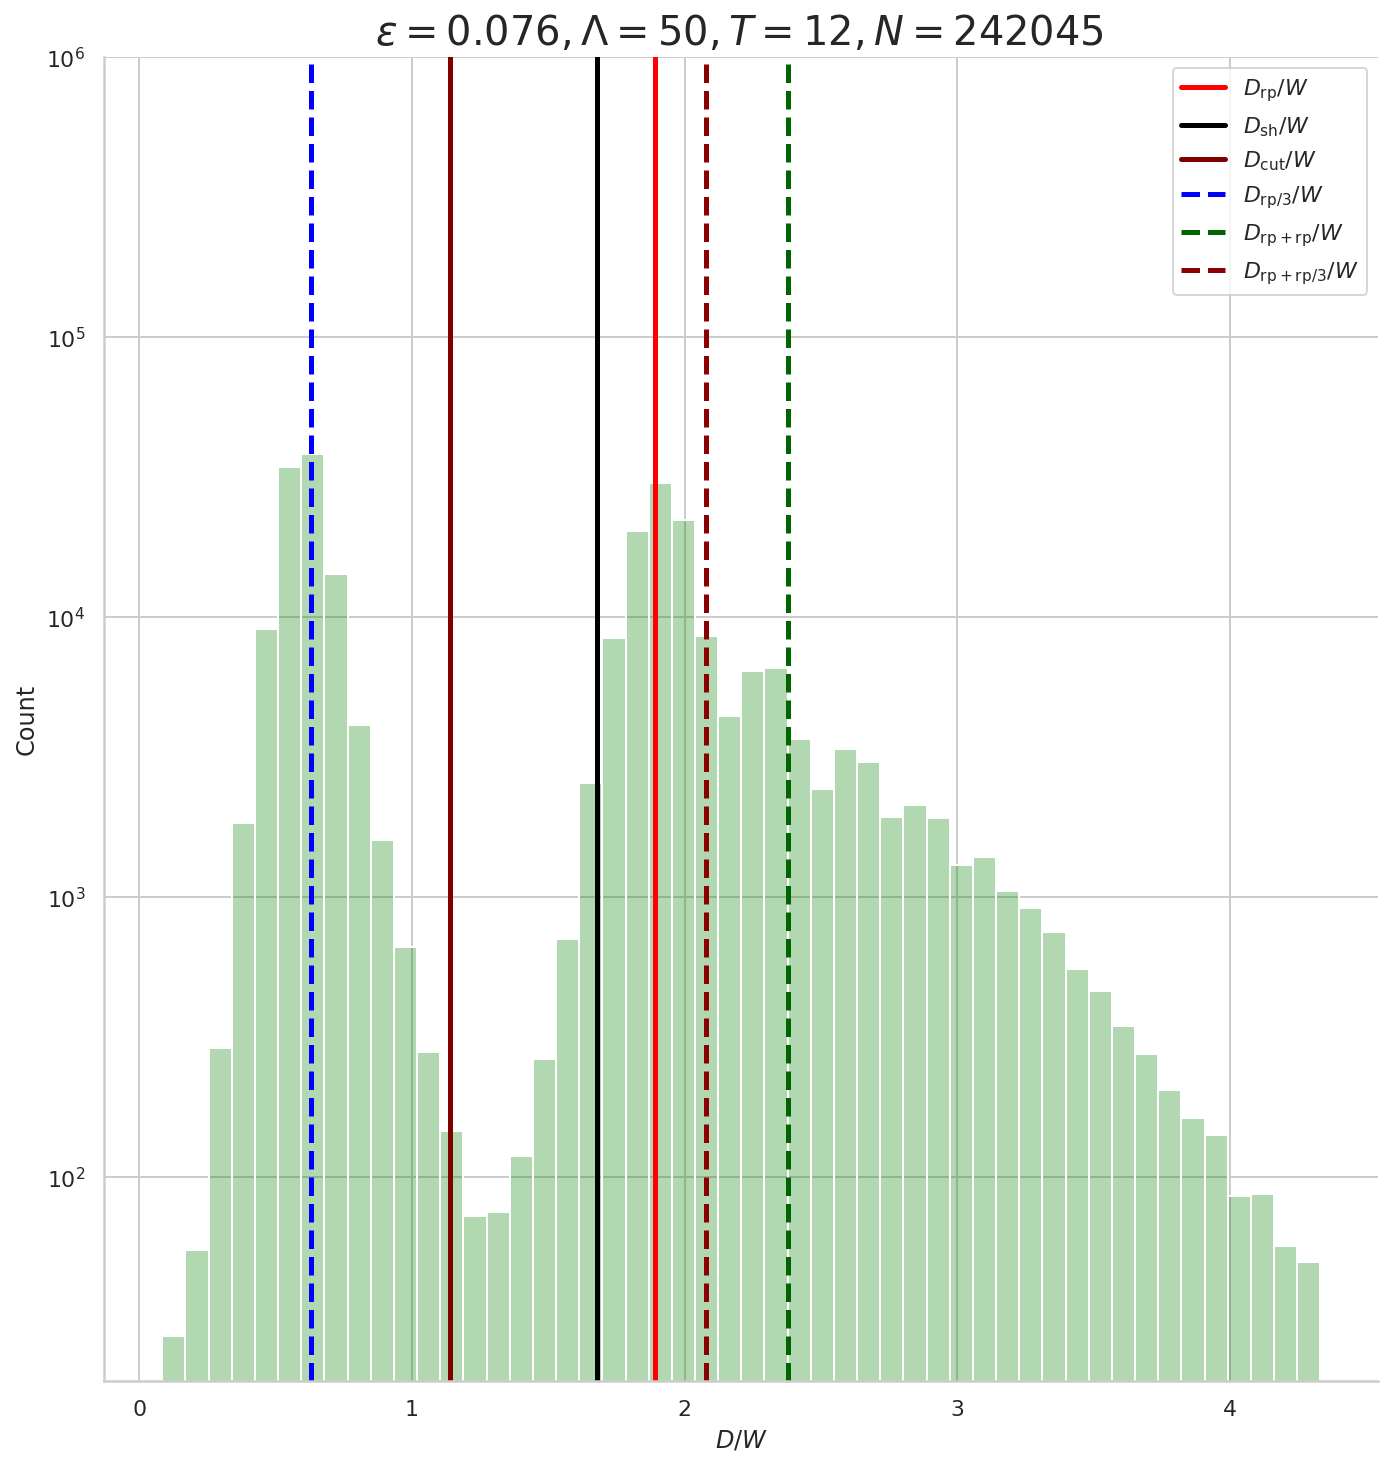

In [131]:
# Dataset d3

display(Image(filename="../d3/img-snapshot-12.png"))

# Select time slice 
time = 12

# Set the number of bins
n_bins = 50

sns.displot(data=d3_new.diameter[(d3_new.time == time)].map(lambda p: p/2.0), kind="hist", kde=False,
            legend=True, palette="bright", height=10.0, aspect=1.0,
           alpha = 0.3 , color = 'green', bins=n_bins) ;
  
#plt.axvline(x = d_max_1, label = r'$D_{\rm{max}}$', color='darkgreen',lw=2.5);
plt.axvline(x = d_rp, label = r'$D_{\rm{rp}}/W$', color='red', lw=2.5);
plt.axvline(x = d_sh, label = r'$D_{\rm{sh}}/W$', color='black', lw=2.5);
plt.axvline(x = d_cut, label = r'$D_{\rm{cut}}/W$', color='maroon', lw=2.5);
plt.axvline(x = d_rp/3.0, label = r'$D_{\rm{rp}/3}/W$', color='blue', lw=2.5, linestyle='--');
plt.axvline(x = d_coalesce(d_rp,1.0,1.0), label = r'$D_{\rm{rp}+\rm{rp}}/W$', color='darkgreen', lw=2.5, linestyle='--');
plt.axvline(x = d_coalesce(d_rp,1.0,0.33), label = r'$D_{\rm{rp}+\rm{rp}/3}/W$', color='darkred', lw=2.5, linestyle='--');
plt.title(r'$\varepsilon = 0.076, \Lambda = 50 , T=%d, N=%d$ ' %(time,d3_new.diameter[d3_new.time == time].shape[0]), fontsize=20);
plt.legend(loc='best');
plt.yscale("log");
plt.ylim(top=1e6);
#plt.xlim(right = 5.0);
plt.xlabel(r'$D/W$');

## Key Findings 

- Two types of main peaks are observed in the distribution corresponding to -  
 1. Linear growth (exponential) of the **Rayleigh-Plateau** optimal wavelength.
 2. Non-linear effects leading to **satellite** drops, which are roughly smaller (volume or mass) by a factor of 10.  



- The secondary peaks are primarily due to **coalescence of different combinations** of the two *primary* drop sizes.  